# Araba Fiyatlarının Tahmin Edilmesi

Kullanılacak kütüphanelerin import edilmesi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

Excel dosyasının okutulması

In [3]:
dataFrame=pd.read_excel("merc.xlsx")

Datasetin yapısının incelenmesi(İlk 5 eleman ile)

In [4]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


Datasetin istatiksel analizinin yapılması

In [5]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


Datasette boş olan verilerin incelenmesi

In [6]:
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

Fiyatların hangi dağılıma benzediği ve outlier değerlerin incelenmesi(grafik yüksekliğinin ve görünümünün ayarlanması)

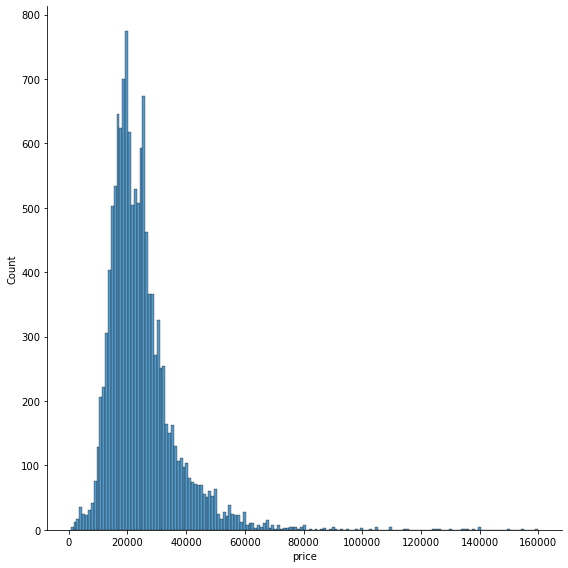

In [29]:
sbn.displot(dataFrame["price"], height=8, aspect=1)

Year değişkenine bakarak yıllara göre fiyat analizi yapılması(X ekseninde bulunan verilerin 45 derece döndürülmesi)

C:\Users\simay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '1970'),
  Text(1, 0, '1997'),
  Text(2, 0, '1998'),
  Text(3, 0, '1999'),
  Text(4, 0, '2000'),
  Text(5, 0, '2001'),
  Text(6, 0, '2002'),
  Text(7, 0, '2003'),
  Text(8, 0, '2004'),
  Text(9, 0, '2005'),
  Text(10, 0, '2006'),
  Text(11, 0, '2007'),
  Text(12, 0, '2008'),
  Text(13, 0, '2009'),
  Text(14, 0, '2010'),
  Text(15, 0, '2011'),
  Text(16, 0, '2012'),
  Text(17, 0, '2013'),
  Text(18, 0, '2014'),
  Text(19, 0, '2015'),
  Text(20, 0, '2016'),
  Text(21, 0, '2017'),
  Text(22, 0, '2018'),
  Text(23, 0, '2019'),
  Text(24, 0, '2020')])

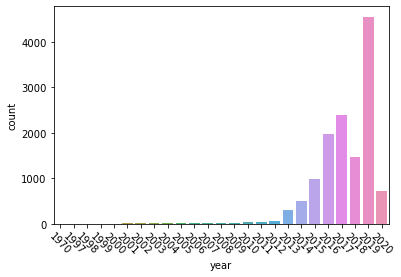

In [30]:
sbn.countplot(dataFrame["year"])
plt.xticks(rotation=-45)

Değişkenler arasındaki ilişkilere bakılması

In [31]:
dataFrame.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


Price değişkeninin diğer verilerle korelasyon ilişkisine bakılması

In [33]:
dataFrame.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

Serpilme diyagramıyla verilerin nerede toplanıldığına bakılması

<AxesSubplot:xlabel='mileage', ylabel='price'>

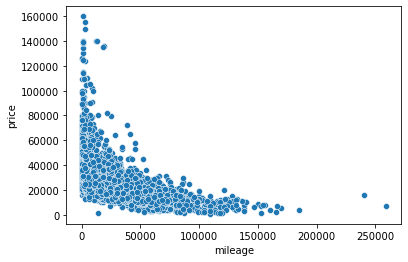

In [34]:
sbn.scatterplot(x="mileage", y="price", data=dataFrame)

Yüksek fiyatlı 20 ürünün özelliklerine göre sıralanması

In [35]:
dataFrame.sort_values("price",ascending=False).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


Güven aralığını %99 alarak 1970 yılından başlayarak 131 verinin silinmesi(13000 verinin %1i silinerek anlamlı veri seti elde edilmeye çalışılmıştır.)

In [36]:
doksanDokuzDF=dataFrame.sort_values("price",ascending=False).iloc[131:]

12869 verinin istatistiksel özelliklerine bakılması

In [37]:
doksanDokuzDF.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


12869 verideki fiyatların dağılımına bakılması

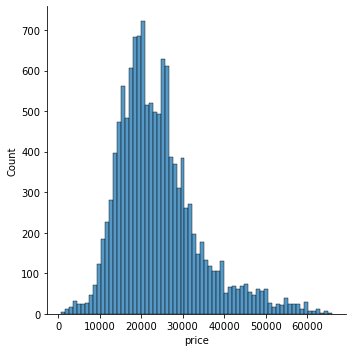

In [40]:
sbn.displot(doksanDokuzDF["price"])

Dataların yıl değişkenine göre fiyatlandırmasına bakılarak gruplandırılması

In [41]:
dataFrame.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

Yukarıdaki gruplamada 1970 yılındaki verinin diğer verilere göre tutarsız olduğu görülüyor. Bundan dolayı veri çıkartılırsa daha anlamlı bir veri setiyle işlem yapılabilir. 

In [42]:
dataFrame[dataFrame.year!=1970].groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

DataFramein %99 güven aralığıyla çalışması

In [43]:
dataFrame=doksanDokuzDF

In [44]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


1970 datasını çıkartma işleminin gerçekleşmesi

In [45]:
dataFrame=dataFrame[dataFrame.year!=1970]

In [46]:
dataFrame.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [24]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


Transmission ifadesi string olduğu için çıkartılmasının daha uygundur.

In [48]:
dataFrame=dataFrame.drop("transmission", axis=1)

In [49]:
dataFrame.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


Bağımlı ve bağımsız değişkenlerin belirlenmesi

In [50]:
y=dataFrame["price"].values
x=dataFrame.drop("price",axis=1).values

Test ve eğitim değişkenlerinin oluşturulması ve import edilmesi

In [51]:
from sklearn.model_selection import train_test_split

Bir tahmin fonksiyonunun parametrelerini öğrenmek ve onu aynı veriler üzerinde test etmek overfittinge yol açacağı için verilerin %30uyla test verisi oluşturarak model eğitilmelidir.

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=10)

In [53]:
len(x_train)

9090

In [54]:
len(y_train)

9090

Ölçeklendirme işleminin yapılması(Bulunan verilerin -1 ile 1 arasına çekilmesi)

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [57]:
x_train=scaler.fit_transform(x_train)

In [58]:
x_test=scaler.transform(x_test)

Model ve katman kütüphanelerinin import edilmesi

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train.shape

(9090, 5)

1 giriş katmanı,5 ara katman, 1 tane de çıkış katmanı oluşturulması. Modelin adam optimizeri ve kayıbın  hata kareler toplamıyla oluşturulması.

In [61]:
model=Sequential()
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

Modelin eğitilmesi için batch size ve epochs(Devir sayısı) belirlenmesi

In [62]:
model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test), batch_size=250,epochs=300)

Epoch 1/300
37/37 [==============================] - 1s 33ms/step - loss: 672145600.0000 - val_loss: 688104128.0000
Epoch 2/300
37/37 [==============================] - 0s 1ms/step - loss: 672121600.0000 - val_loss: 688054848.0000
Epoch 3/300
37/37 [==============================] - 0s 1ms/step - loss: 672009216.0000 - val_loss: 687828608.0000
Epoch 4/300
37/37 [==============================] - 0s 1ms/step - loss: 671540608.0000 - val_loss: 686937024.0000
Epoch 5/300
37/37 [==============================] - 0s 1ms/step - loss: 669795136.0000 - val_loss: 683766720.0000
Epoch 6/300
37/37 [==============================] - 0s 1ms/step - loss: 664094784.0000 - val_loss: 673981120.0000
Epoch 7/300
37/37 [==============================] - 0s 1ms/step - loss: 647716736.0000 - val_loss: 647513152.0000
Epoch 8/300
37/37 [==============================] - 0s 1ms/step - loss: 607183616.0000 - val_loss: 586717376.0000
Epoch 9/300
37/37 [==============================] - 0s 1ms/step - loss: 523202

37/37 [==============================] - 0s 1ms/step - loss: 49203348.0000 - val_loss: 50347932.0000
Epoch 73/300
37/37 [==============================] - 0s 2ms/step - loss: 48042608.0000 - val_loss: 49189080.0000
Epoch 74/300
37/37 [==============================] - 0s 2ms/step - loss: 46853224.0000 - val_loss: 48171880.0000
Epoch 75/300
37/37 [==============================] - 0s 1ms/step - loss: 45748696.0000 - val_loss: 46915236.0000
Epoch 76/300
37/37 [==============================] - 0s 1ms/step - loss: 44547384.0000 - val_loss: 45586516.0000
Epoch 77/300
37/37 [==============================] - 0s 1ms/step - loss: 43332728.0000 - val_loss: 44387156.0000
Epoch 78/300
37/37 [==============================] - 0s 2ms/step - loss: 42130084.0000 - val_loss: 43159716.0000
Epoch 79/300
37/37 [==============================] - 0s 1ms/step - loss: 40929848.0000 - val_loss: 41935024.0000
Epoch 80/300
37/37 [==============================] - 0s 2ms/step - loss: 39745104.0000 - val_loss: 4

37/37 [==============================] - 0s 1ms/step - loss: 20531418.0000 - val_loss: 21834470.0000
Epoch 144/300
37/37 [==============================] - 0s 1ms/step - loss: 20479172.0000 - val_loss: 21807518.0000
Epoch 145/300
37/37 [==============================] - 0s 1ms/step - loss: 20419100.0000 - val_loss: 21764992.0000
Epoch 146/300
37/37 [==============================] - 0s 1ms/step - loss: 20379868.0000 - val_loss: 21736524.0000
Epoch 147/300
37/37 [==============================] - 0s 1ms/step - loss: 20347186.0000 - val_loss: 21694890.0000
Epoch 148/300
37/37 [==============================] - 0s 1ms/step - loss: 20303358.0000 - val_loss: 21669702.0000
Epoch 149/300
37/37 [==============================] - 0s 1ms/step - loss: 20297454.0000 - val_loss: 21636136.0000
Epoch 150/300
37/37 [==============================] - 0s 1ms/step - loss: 20257712.0000 - val_loss: 21629362.0000
Epoch 151/300
37/37 [==============================] - 0s 1ms/step - loss: 20308492.0000 - val

Epoch 214/300
37/37 [==============================] - 0s 1ms/step - loss: 18938406.0000 - val_loss: 20525874.0000
Epoch 215/300
37/37 [==============================] - 0s 1ms/step - loss: 18912804.0000 - val_loss: 20439642.0000
Epoch 216/300
37/37 [==============================] - 0s 1ms/step - loss: 18909682.0000 - val_loss: 20475884.0000
Epoch 217/300
37/37 [==============================] - ETA: 0s - loss: 21006090.00 - 0s 1ms/step - loss: 18903560.0000 - val_loss: 20428220.0000
Epoch 218/300
37/37 [==============================] - 0s 1ms/step - loss: 18917552.0000 - val_loss: 20431872.0000
Epoch 219/300
37/37 [==============================] - 0s 1ms/step - loss: 18890944.0000 - val_loss: 20451846.0000
Epoch 220/300
37/37 [==============================] - 0s 1ms/step - loss: 18869392.0000 - val_loss: 20372892.0000
Epoch 221/300
37/37 [==============================] - 0s 1ms/step - loss: 18854078.0000 - val_loss: 20383048.0000
Epoch 222/300
37/37 [=============================

37/37 [==============================] - 0s 1ms/step - loss: 18322702.0000 - val_loss: 19831408.0000
Epoch 285/300
37/37 [==============================] - 0s 1ms/step - loss: 18366442.0000 - val_loss: 19749454.0000
Epoch 286/300
37/37 [==============================] - 0s 1ms/step - loss: 18298888.0000 - val_loss: 19802312.0000
Epoch 287/300
37/37 [==============================] - 0s 1ms/step - loss: 18292756.0000 - val_loss: 19762532.0000
Epoch 288/300
37/37 [==============================] - 0s 1ms/step - loss: 18302712.0000 - val_loss: 19809734.0000
Epoch 289/300
37/37 [==============================] - 0s 1ms/step - loss: 18284740.0000 - val_loss: 19727648.0000
Epoch 290/300
37/37 [==============================] - 0s 1ms/step - loss: 18284864.0000 - val_loss: 19746768.0000
Epoch 291/300
37/37 [==============================] - 0s 1ms/step - loss: 18276382.0000 - val_loss: 19722910.0000
Epoch 292/300
37/37 [==============================] - 0s 1ms/step - loss: 18293754.0000 - val

In [63]:
kayip=pd.DataFrame(model.history.history)

In [64]:
kayip.head()

,loss,val_loss
0,672145600.0,688104128.0
1,672121600.0,688054848.0
2,672009216.0,687828608.0
3,671540608.0,686937024.0
4,669795136.0,683766720.0


Loss ve Validation Loss birlikte azalarak hareket ediyor mu? Bunun için grafik çizilebilir.

<AxesSubplot:>

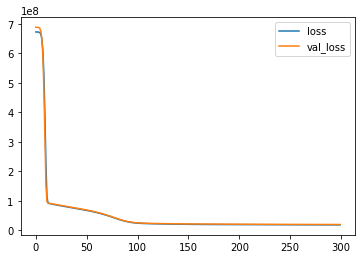

In [65]:
kayip.plot()

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [67]:
tahminDizisi=model.predict(x_test)

Tahmin dizisi ile y test arasındaki absolute farka bakılır.

In [69]:
mean_absolute_error(y_test,tahminDizisi)

3153.360273690599

Dataframe özelliğinden priceın ortalama değerine bakılır. Mean absolute değeri(3153 para birimi) ortalama değerden(24074 para birimi) ne kadar sapabilir.

In [44]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


Aşağıdaki grafikte linear regression görülmekte fakat küçük sapmalar mevcut eğer dilerseniz bu sapmalar için gerekli düzenlemeler yapabilirsiniz.(Epoch sayısı arttırma gibi)

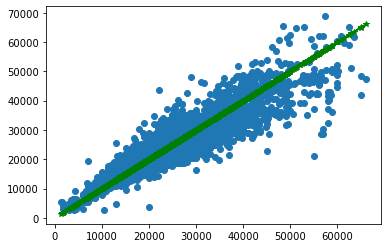

In [70]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")

3. Elemanın fiyatına bakalım.

In [71]:
dataFrame.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

3. elemanı çıkartarak yeni bir veri serisi oluşturalım.

In [73]:
yeniArabaSeries=dataFrame.drop("price", axis=1).iloc[2]

Yeni veri serisini ölçeklendirelim.

In [74]:
yeniArabaSeries=scaler.transform(yeniArabaSeries.values.reshape(-1,5))

Tahmin edilen fiyat 63477 para birimi oluyor. Yeni veri serisi oluştururken çıkarttığımız eleman ise 65980 para birimiydi. Tahmin işlemi gerçekleştirilmiş oldu.

In [77]:
model.predict(yeniArabaSeries)

array([[63477.742]], dtype=float32)